MAE: 2119705.449078139
MSE: 10702578994439.215
R² Score: -4.4646843509354994e-05


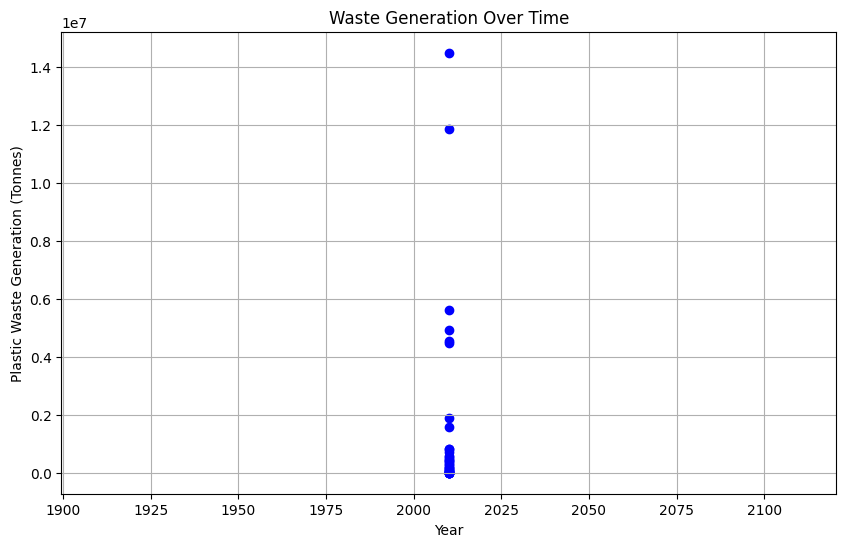

Predicted Waste Generation in 2025: 1,622,195 tonnes


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load Production Dataset
prod_df = pd.read_csv('/plastic_prod_clean.csv')

# Rename 'entity' → 'country' (optional)
prod_df.rename(columns={'entity': 'country'}, inplace=True)

# Features: Year
X = prod_df[['year']]
# Target: plastic_waste_generation_(tonnes,_total)
y = prod_df['plastic_waste_generation_(tonnes,_total)']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='orange')
plt.xlabel('Year')
plt.ylabel('Plastic Waste Generation (Tonnes)')
plt.title('Waste Generation Over Time')
plt.grid(True)
plt.show()

# Save Model
joblib.dump(model, 'waste_generation_year_predictor.pkl')

# Example Inference
sample_year = np.array([[2025]])
predicted_waste = model.predict(sample_year)
print(f"Predicted Waste Generation in 2025: {predicted_waste[0]:,.0f} tonnes")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.5178305199054156
Mean Squared Error (MSE): 3.515744707839429
R² Score: -2.2883548209876547


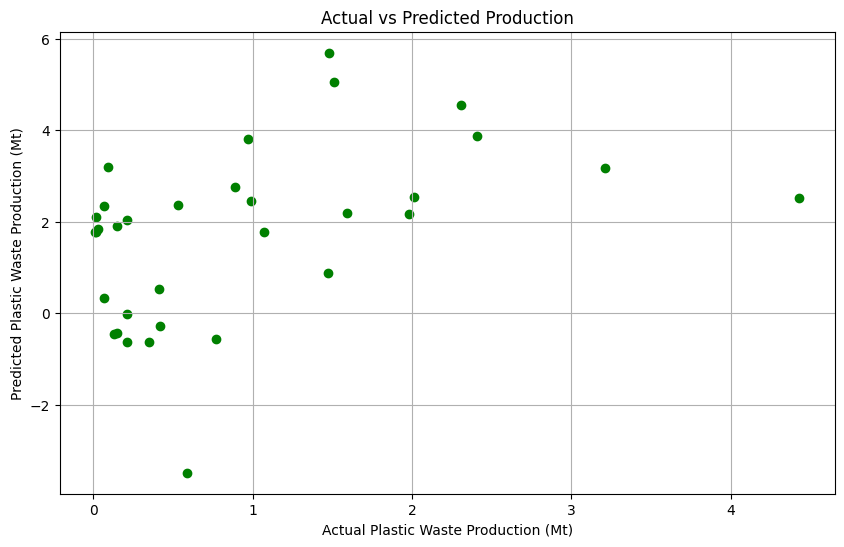


Predicted Plastic Production (Mt): 4.18 Mt


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# 📚 STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 🚀 STEP 2: Load Dataset
waste_df = pd.read_csv('/plastic_waste_clean.csv')

# ✅ STEP 3: Handle Missing Values Properly
waste_df['recycling_rate'] = waste_df['recycling_rate'].fillna(waste_df['recycling_rate'].mean())
waste_df['per_capita_waste_kg'] = waste_df['per_capita_waste_kg'].fillna(waste_df['per_capita_waste_kg'].mean())

# Drop rows where 'coastal_waste_risk' is NaN
waste_df = waste_df.dropna(subset=['coastal_waste_risk'])

# Encode 'coastal_waste_risk' to numeric
waste_df['coastal_waste_risk'] = waste_df['coastal_waste_risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Drop rows with NaN in the features after imputation and encoding
waste_df = waste_df.dropna(subset=['recycling_rate', 'per_capita_waste_kg', 'coastal_waste_risk'])


# ✅ STEP 4: Define Features and Target
X = waste_df[['recycling_rate', 'per_capita_waste_kg', 'coastal_waste_risk']]
y = waste_df['total_plastic_waste_mt']

# ✅ STEP 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ STEP 7: Predict
y_pred = model.predict(X_test)

# ✅ STEP 8: Model Evaluation
print("\nModel Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Plastic Waste Production (Mt)')
plt.ylabel('Predicted Plastic Waste Production (Mt)')
plt.title('Actual vs Predicted Production')
plt.grid(True)
plt.show()

# ✅ STEP 9: Save Model
joblib.dump(model, 'plastic_production_predictor.pkl')

# ✅ STEP 10: Example Inference Prediction
loaded_model = joblib.load('plastic_production_predictor.pkl')
sample_input = np.array([[20.0, 30.0, 2]])  # recycling_rate=20%, per_capita=30kg, coastal_risk=High (2)
predicted_production = loaded_model.predict(sample_input)
print(f"\nPredicted Plastic Production (Mt): {predicted_production[0]:.2f} Mt")